<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

Can we predict the prices of home sales in the Ames, Iowa market based on certain features of the home?  Which features are most important (have the highest correlation) in predicting the price and which features impact the value (higher coefficients in the linear model) the most?

Additionally, can a linear regression model score with high accuracy ($R^2$ greater than 0.5)?

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

To-Do: Background about Ames

### Datasets
To analyze this problem, we are using housing data from Ames, Iowa.

For modeling, I am using the train.csv file in the github repo under datasets/.

Then I will run my model to predict the prices in the test.csv file and submit my prices by ID

### Outside Research

To-Do: Additional Research for Housing stuff

### Data cleaning functions
    
As needed

You will use these functions later on in the project!

In [1]:
def str_to_num(x):
    '''fn takes in a string that is a numeral with other special characters, 
    removes the special characters and returns a float'''
    try:
        return float(x.replace(',',''))
    except:
        return x

In [2]:
def pct_to_dec(x):
    '''fn takes in a string that is a numbered %, and removes the special character and converts it to a decimal'''
    try:
        return float(x.strip('%'))/100
    except:
        return x

In [3]:
def pct_from_total(x):
    '''fn takes in an array, assuming the first item is the total and the rest are subgroups.
    return a list with the total first and the other elements as percentages'''
    try:
        return ([x[0]] + [item/x[0] for item in x[1:]])
    except:
        return x

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [4]:
# Imports:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import random as random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [5]:
#initialize raw dataframe that i can refer back to if needed
df = pd.read_csv('./datasets/train.csv')

#create copy that will be written over
ames = df.copy()
ames

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


#### Features I'd want to look into further.

I spent a good couple hours just trying to understand all the features, how they're categorized, and some additional real-estate jargon.  This basic list is unfortunately the culmination of those few hours.  There's not too much modeling/cleaning work that got done today, but now I know where to focus my efforts.
Cross-referencing from data-dictionary:
http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

* MS Zoning - zoning classification (low density vs industrial etc): useful, but need to dummify
* Lot Area - continuous, square footage
* Utilities - ordinal, need to dummify
* Neighborhood - useful, but is it already correlated to something else?
* Bldg Type - type of family dwelling (single-fam vs duplex vs townhouse etc)
* House style - style (num of stories, split foyer)
* Overall Qual - ordinal, from very poor to very excellent
* Overall Cond - ordinal, from very poor to very excellent
* Year Remod/Add - discrete, year of latest construction (original date if no new construction)
* Exter Qual - ordinal, from poor to excellent
* Exter Cond - ordinal, from poor to excellent
* Bsmt Qual - height, from poor to excellent (NA)
* Bsmt Cond - general condition, from poor to excellent (NA)
* Bsmt Exposure - walkout exposure, from none to good
* BsmtFin Type1 - quality of finished living quarters, from unf to good quality
* BsmtFin SF 1 - sq ft of finished basement
* Total Bsmt SF - total sq ft of basement
* HeatingQC - quality of heating, from poor to excellent
* Central Air - binary, yes or no
* Gr Liv Area - above ground living area square foot (seems to be mentioned in the documentation a lot)
* Bsmt Full Bath/Bsmt Half Bath/Full Bath/Half Bath - can all be combined into 'Baths'?
* Bedroom - # of discrete rooms above grade
* Kitchen - # of discrete kitchens above grade
* KitchenQual - quality of kitchen, from poor to excellent
* TotRmsAbvGrd - total # of livable rooms
* Functional - home functionality, from salvage only to typical
* Garage Finish - interior finish quality, from none to finished
* Garage Cars - num of cars that fit
* Garage Area - size in sq ft
* Garage Qual - quality, from poor to excellent (NA)
* Garage Cond - condition, from poor to excellent (NA)
* Wood Deck SF/Open Porch SF/Ecnlosed Porch/3-Ssn Porch/Screen Porch - can all be combined into 'porch/deck sq ft'
* Misc Val - value of additional assets
* Mo Sold - month of sale
* Yr sold - year of sale, but hard to use as a predictor since you can't repeat a year
* Sale Condition - normal vs abnormal/adjland/family/partial - would be good to investigate further

#### Clean Data

In [6]:
#apply snake_case to all columns
ames.columns = [col.lower().replace(' ', '_') for col in ames.columns]
ames.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [7]:
y = ames['saleprice']
ames = ames.drop(columns = ['pid', 'saleprice'])

In [8]:
#new strategy: split all features into nominal/ordinal/discrete/continuous, 
#and make a quick model with continuous features only
#this info is in the data documentation

nominal = ['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type']
ordinal = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence']
discrete = ['Year Built', 'Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Mo Sold', 'Yr Sold']
continuous = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']

#ames_continuous = ames[continuous]
#ames_continuous.head()

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

**My Data Dictionary**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|2017_avg_income|*float*|all_state_info.csv|Median household income, by state, in 2017 (in USD)|
|2018_avg_income|*float*|all_state_info.csv|Median household income, by state, in 2018 (in USD)|
|2019_avg_income|*float*|all_state_info.csv|Median household income, by state, in 2019 (in USD)|

## Exploratory Data Analysis & Visualization

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement.
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [9]:
def scatter_plot(df, column, ax):
    '''fn takes in a df, a column name (string), and a defined plt object and returns a scatter plot'''
    #add a scatter plot of the observed values against the states
    
    #random colors each time I run the function
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    
    ax.scatter(df.index, df[column],s = 10,color=color,label=column)
    ax.set_xlabel('States');

In [10]:
def bar_plot(df, column, ax):
    '''fn takes in a df, a column name (string), and a defined plt object and returns a bar plot'''
    #add a bar plot of the average value of a category against the states
    
    #random colors
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    
    ax.bar(x=df.index, height=df[column], label=column, color=color, alpha=0.7)
    ax.set_xlabel('States');

In [11]:
ames.columns

Index(['id', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish',

<AxesSubplot:>

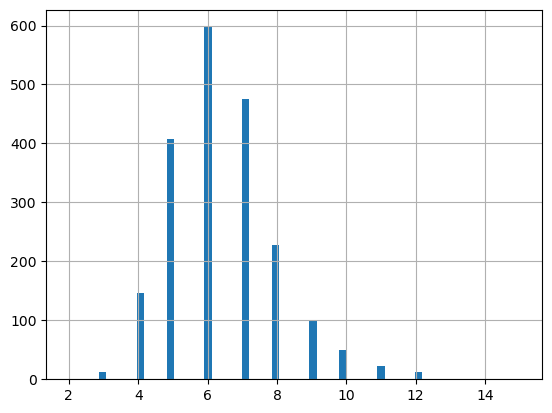

In [12]:
#histograms
ames['totrms_abvgrd'].hist(bins = 60)

<AxesSubplot:xlabel='gr_liv_area', ylabel='saleprice'>

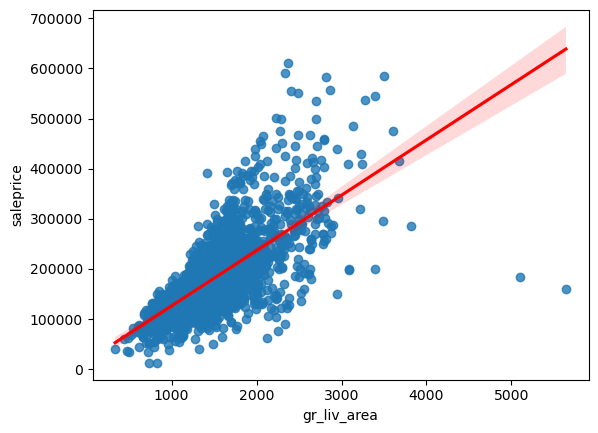

In [13]:
#sns.scatterplot(x=ames['bedroom_abvgr'], y=y);
sns.regplot(y=y, x=ames['gr_liv_area'], fit_reg=True, line_kws={"color": "red"})

In [14]:
bad_rows = ames[ames['gr_liv_area']>4000].index
ames.drop(labels=bad_rows,inplace=True)

In [15]:
y.drop(labels=bad_rows,inplace=True)
ames.shape, y.shape

((2049, 79), (2049,))

#### First attempt - Model with only Numeric Data (discrete and continuous)

In [16]:
#only keep numeric features
ames = ames._get_numeric_data()
#ames_test = ames_test._get_numeric_data()

In [17]:
print(ames.shape)
#2051,39

ames.isnull().sum().sort_values(ascending=False).loc[lambda x: x>0]
# lots of nulls in lot frontage, mas vnr area, basement features,
# fireplace, garage features, pool quality (only 9 entries),fence, misc

(2049, 37)


lot_frontage      330
garage_yr_blt     114
mas_vnr_area       22
bsmt_half_bath      2
bsmt_full_bath      2
bsmtfin_sf_2        1
garage_cars         1
garage_area         1
total_bsmt_sf       1
bsmt_unf_sf         1
bsmtfin_sf_1        1
dtype: int64

In [18]:
#let's drop all columns with nulls, based on the list above, i don't think they're super relevant to keep

ames_id = ames['id']

ignore_features = ['id']
ignore_features = ignore_features + [col for col in ames.columns if (ames[col].isnull().sum() > 0)]

print(ignore_features)
ames.drop(labels=ignore_features, axis=1, inplace=True)

['id', 'lot_frontage', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath', 'garage_yr_blt', 'garage_cars', 'garage_area']


#### Feature Engineering

In [19]:
ames.head()

,ms_subclass,lot_area,overall_qual,overall_cond,year_built,year_remod/add,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,...,fireplaces,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
0,60,13517,6,8,1976,2005,725,754,0,1479,...,0,0,44,0,0,0,0,0,3,2010
1,60,11492,7,5,1996,1997,913,1209,0,2122,...,1,0,74,0,0,0,0,0,4,2009
2,20,7922,5,7,1953,2007,1057,0,0,1057,...,0,0,52,0,0,0,0,0,1,2010
3,60,9802,5,5,2006,2007,744,700,0,1444,...,0,100,0,0,0,0,0,0,4,2010
4,50,14235,6,8,1900,1993,831,614,0,1445,...,0,0,59,0,0,0,0,0,3,2010


In [20]:
ames.insert(2, "avg_qual_cond", 0, True)
ames.avg_qual_cond = (ames.overall_qual+ames.overall_cond)/2

ames.insert(17, "outdoor_fin_sf", 0, True)
ames.outdoor_fin_sf = (ames.wood_deck_sf+ames.open_porch_sf
                          +ames.enclosed_porch+ames['3ssn_porch']+ames.screen_porch)

ames.insert(11, "baths", 0, True)
ames.baths = ames.full_bath+(ames.half_bath/2)
ames.head()

,ms_subclass,lot_area,avg_qual_cond,overall_qual,overall_cond,year_built,year_remod/add,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,...,outdoor_fin_sf,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
0,60,13517,7.0,6,8,1976,2005,725,754,0,...,44,0,44,0,0,0,0,0,3,2010
1,60,11492,6.0,7,5,1996,1997,913,1209,0,...,74,0,74,0,0,0,0,0,4,2009
2,20,7922,6.0,5,7,1953,2007,1057,0,0,...,52,0,52,0,0,0,0,0,1,2010
3,60,9802,5.0,5,5,2006,2007,744,700,0,...,100,100,0,0,0,0,0,0,4,2010
4,50,14235,7.0,6,8,1900,1993,831,614,0,...,59,0,59,0,0,0,0,0,3,2010


In [21]:
ames.drop(columns=['overall_qual','overall_cond','low_qual_fin_sf','wood_deck_sf',
                      'open_porch_sf','enclosed_porch','3ssn_porch','screen_porch',
                      'pool_area','yr_sold','full_bath','half_bath'],axis=1,inplace=True)
ames.head()

,ms_subclass,lot_area,avg_qual_cond,year_built,year_remod/add,1st_flr_sf,2nd_flr_sf,gr_liv_area,baths,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,outdoor_fin_sf,misc_val,mo_sold
0,60,13517,7.0,1976,2005,725,754,1479,2.5,3,1,6,0,44,0,3
1,60,11492,6.0,1996,1997,913,1209,2122,2.5,4,1,8,1,74,0,4
2,20,7922,6.0,1953,2007,1057,0,1057,1.0,3,1,5,0,52,0,1
3,60,9802,5.0,2006,2007,744,700,1444,2.5,3,1,7,0,100,0,4
4,50,14235,7.0,1900,1993,831,614,1445,2.0,3,1,6,0,59,0,3


#### Split the data

In [23]:
X_train, X_val, y_train, y_val = train_test_split(ames, y, test_size = 0.2, random_state = 199)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

#### Transform the data

In [24]:
ss = StandardScaler()

Xs_train = ss.fit_transform(X_train)
Xs_train = pd.DataFrame(Xs_train, columns=ss.get_feature_names_out())

In [25]:
Xs_val = pd.DataFrame(ss.transform(X_val), columns=ss.get_feature_names_out())

### Modeling & evaluation!

In [26]:
#create your baseline model first!
base = [y_train.mean()]*len(y_val)

r2_score(y_val, base)

-5.006026104270589e-05

In [27]:
#instantiate and fit linear regression model
lr = LinearRegression()
lr.fit(Xs_train, y_train)

LinearRegression()

In [28]:
cross_val_score(lr, Xs_train, y_train).mean()

0.8263587336922738

In [29]:
#score it twice!

a1 = lr.score(Xs_train, y_train)
a2 = lr.score(Xs_val, y_val)

b1 = mean_squared_error(y_train, lr.predict(Xs_train))**0.5
b2= mean_squared_error(y_val, lr.predict(Xs_val))**0.5

score_model1 = f'Train score: {a1}\nVal score: {a2}\nTrain RMSE: {b1}\nVal RMSE: {b2}'
print(score_model1)

Train score: 0.8325860171250751
Val score: 0.8209668428681698
Train RMSE: 32796.734853357935
Val RMSE: 32012.817735947887


--- 
# Part 3

Part 3 requires knowledge of modeling and cross validation.

---

In [30]:
#try to improve model with regularization
#Ridge
ridge = RidgeCV(alphas = np.logspace(0,5,100))

#fit to scaled training data
ridge.fit(Xs_train, y_train)
print('Alpha: ', ridge.alpha_)

#score it twice!
print('Train score: ', ridge.score(Xs_train, y_train))
print('Validation score: ', ridge.score(Xs_val,y_val))
print('Train RMSE: ', mean_squared_error(y_train, ridge.predict(Xs_train))**0.5)
print('Validation RMSE: ', mean_squared_error(y_val, ridge.predict(Xs_val))**0.5)
#scores are almost the same as without regularization

Alpha:  2.0092330025650473
Train score:  0.832546024884062
Validation score:  0.8217302811489907
Train RMSE:  32800.651899536286
Validation RMSE:  31944.489832721967


/Users/jahnavik/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1911: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha**-1)


In [31]:
import warnings

#Lasso
#instantiate it!
lasso = LassoCV(alphas = np.arange(0.001, 10, 1))

#fit it!
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    lasso.fit(Xs_train, y_train)

#what's our best alpha?
print('Alpha: ', lasso.alpha_)

#score it twice!
print('Train score: ', lasso.score(Xs_train, y_train))
print('Validation score: ', lasso.score(Xs_val, y_val))
print('Train RMSE: ', mean_squared_error(y_train, lasso.predict(Xs_train))**0.5)
print('Validation RMSE: ', mean_squared_error(y_val, lasso.predict(Xs_val))**0.5)

Alpha:  9.000999999999998
Train score:  0.8325849056415184
Validation score:  0.8210521065875127
Train RMSE:  32796.84372410568
Validation RMSE:  32005.193849373696


In [32]:
used_coeff = [(round(coeff,2), Xs_train.columns[index]) for index, coeff in enumerate(lasso.coef_) if coeff>0]
print(len(used_coeff))
used_coeff

11


[(4869.83, 'lot_area'),
 (18815.8, 'avg_qual_cond'),
 (23523.78, 'year_built'),
 (2043.29, 'year_remod/add'),
 (37881.9, '1st_flr_sf'),
 (25675.06, '2nd_flr_sf'),
 (4212.57, 'gr_liv_area'),
 (7154.79, 'totrms_abvgrd'),
 (1895.17, 'fireplaces'),
 (4623.68, 'outdoor_fin_sf'),
 (29.55, 'mo_sold')]

In [37]:
# import training data now and create predictions for prices
ames_test = pd.read_csv('./datasets/test.csv')

ames_test.head(1)

#data cleaning
ames_test.columns = [col.lower().replace(' ', '_') for col in ames_test.columns]
ames_test.drop(columns = ['pid'], inplace=True)
ames_test = ames_test._get_numeric_data()

#stash id column
test_id = ames_test['id']

#remove all columns that were removed from ames (any column with even 1 null
#print(ignore_features)
ames_test.drop(labels=ignore_features, axis=1, inplace=True)
ames_test.shape

#feature engineering reproduction
ames_test.insert(2, "avg_qual_cond", 0, True)
ames_test.avg_qual_cond = (ames_test.overall_qual+ames_test.overall_cond)/2

ames_test.insert(17, "outdoor_fin_sf", 0, True)
ames_test.outdoor_fin_sf = (ames_test.wood_deck_sf+ames_test.open_porch_sf
                          +ames_test.enclosed_porch+ames_test['3ssn_porch']+ames_test.screen_porch)

ames_test.insert(11, "baths", 0, True)
ames_test.baths = ames_test.full_bath+(ames_test.half_bath/2)
ames_test.head()

ames_test.drop(columns=['overall_qual','overall_cond','low_qual_fin_sf','wood_deck_sf',
                      'open_porch_sf','enclosed_porch','3ssn_porch','screen_porch',
                      'pool_area','yr_sold','full_bath','half_bath'],axis=1,inplace=True)
ames_test.head()

#standard scale and recreate dataframe
Xs_test = pd.DataFrame(ss.transform(ames_test), columns=ss.get_feature_names_out())
Xs_test.head(2)

,ms_subclass,lot_area,avg_qual_cond,year_built,year_remod/add,1st_flr_sf,2nd_flr_sf,gr_liv_area,baths,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,outdoor_fin_sf,misc_val,mo_sold
0,3.106945,-0.126079,1.344999,-2.057162,-1.611731,-0.669299,1.643378,0.888743,0.386689,1.392133,4.567274,1.672004,-0.924138,-0.041171,-0.096682,-0.828250
1,0.766903,-0.050025,-1.514956,0.177556,-0.333936,2.116247,-0.771516,0.968491,0.386689,3.806637,4.567274,2.320930,-0.924138,-0.054267,-0.096682,0.625178


In [38]:
#create 'final' model from lasso reg and train data
lasso_sub = Lasso(alpha = lasso.alpha_)
lasso_sub.fit(Xs_train, y_train)

#make predictions
preds = lasso_sub.predict(Xs_test)
print(preds.shape)
preds = pd.DataFrame(preds, columns = ['SalePrice'])
preds.insert(loc=0, column='id', value = test_id)
print(preds)

#save submission csv and drop index
preds.to_csv('./datasets/lasso_1_numerics_only.csv', index = False)

(878,)
       id      SalePrice
0    2658  133487.667492
1    2718  162922.192955
2    2414  198845.507307
3    1989  103728.340250
4     625  175201.204439
..    ...            ...
873  1662  195970.926444
874  1234  224773.128847
875  1373  136140.420669
876  1672   96842.185763
877  1939   97291.621548

[878 rows x 2 columns]


# Part 4

## Conclusions and Recommendations

To-Do: Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

## Citations of Data and Research

1. 
2.
3. 